## Maximizing mutual benefit by implementing Nash Equilibrium strategy in Non-Zero-Sum Competitive Games

In [2]:
# my imports
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd



### Abstract:
The aim of this project is to explore the applicability and effectiveness of the Nash Equilibrium concept in a finite non-zero-sum competitive games such as Prisoner's dilemma, Battle of the Sexes, Deadlock, etc. By analyzing various game scenarios and implementing Nash equilibrium strategies, the project seeks to prove that the mutual benefits (combined payoff) of equilibrium outcomes are superior compared to purely competitive strategies or best outcome actions in long-term finite competitive interactions. Outside of the project's scope are the cooperative scenarios and multi-level stochastic (Markov) games as these scenarios have been extensively examined in previous works.

### 1. Introduction to Game Theory:
What is Game Theory?
Significance and practical applications of Game Theory.

### 2. Introduction to Nash Equilibrium:
Overview of Nash equilibrium as a solution concept in game theory and previous research.
Explanation of Nash Equilibrium's relevance in competitive environments and its implications in the process of strategic decision-making.

### 3. Characteristics of Non-Zero-Sum Games:
Definition and characteristics of non-zero sum games.
Distinction from zero-sum games and implications for strategic interactions.

### 4. Mutual Benefits in Non-Zero-Sum Games:
How Nash equilibrium strategies can lead to mutually beneficial outcomes in non-zero sum games.
Scenarios where cooperation among rational agents yields superior outcomes compared to purely competitive strategies.

### 5. Examples of Non-Zero-Sum Competitive Games:
Identification of specific game scenarios of non-zero-sum competitive interactions.
Description of each game scenario and its strategic dynamics.

### 6. Implementation of Nash Equilibrium Strategies:
Methodology for implementing Nash equilibrium strategies in non-zero-sum games.
Computational techniques and software tools for analyzing equilibrium outcomes.

### 7. Simulation Results:
Presentation of simulation results for the selected game scenarios.
Analysis of equilibrium strategies and outcomes.

In [3]:
# function used to randomize the numbers for a 4 x 4 matrix
def randomize():
    numbers = list(range(1, 9))
    shuffle(numbers)
    numbers_for_matrix = numbers[0:4]
    return numbers_for_matrix

In [124]:
def find_nash_equilibrium(numbers_for_a, numbers_for_b):
    
    #build the game matrix:


    matrix = (numbers_for_a, numbers_for_b)

    # get all possible outcomes as objects {coordinate; value}:
    l_l_a = {'coordinates': (0, 0), 'value': matrix[0][0]} # if b goes left, a goes left value for A
    l_r_a = {'coordinates': (0, 1), 'value': matrix[0][1]} # if b goes left, a goes right value for A
    r_l_a = {'coordinates': (0, 2), 'value': matrix[0][2]} # if b goes right, a goes left value for A
    r_r_a = {'coordinates': (0, 3), 'value': matrix[0][3]} # if b goes right, a goes right value for A
    l_l_b = {'coordinates': (1, 0), 'value': matrix[1][0]} # if a goes left, b goes left value for B
    l_r_b = {'coordinates': (1, 1), 'value': matrix[1][1]} # if a goes left, b goes right value for B
    r_l_b = {'coordinates': (1, 2), 'value': matrix[1][2]} # if a goes right, b goes left value for B
    r_r_b = {'coordinates': (1, 3), 'value': matrix[1][3]} # if a goes right, b goes right value for B

    # find best outcomes for each oposing player decision from type "A goes left - B best outcome":
    find_max_and_index = lambda x, y: (x['value'], x['coordinates'][1]) if x['value'] > y['value'] else (y['value'], y['coordinates'][1])

    b_goes_left_a_best_outcome, b_goes_left_a_best_outcome_index = find_max_and_index(l_l_a, l_r_a)
    b_goes_right_a_best_outcome, b_goes_right_a_best_outcome_index = find_max_and_index(r_l_a, r_r_a)
    a_goes_left_b_best_outcome, a_goes_left_b_best_outcome_index = find_max_and_index(l_l_b, l_r_b)
    a_goes_right_b_best_outcome, a_goes_right_b_best_outcome_index = find_max_and_index(r_l_b, r_r_b)

    # QA:
    # print('      Left | Right')
    # print('      -----------')
    # print(f"Left  {l_l_a['value']}, {l_l_b['value']} | {l_r_a['value']}, {l_r_b['value']}")
    # print('      -----------')
    # print(f"Right {r_l_a['value']}, {r_l_b['value']} | {r_r_a['value']}, {r_r_b['value']}")
    # print('      -----------')
    # print(f'b_goes_left_a_best_outcome: {b_goes_left_a_best_outcome}')
    # print(f'b_goes_left_a_best_outcome_index: {b_goes_left_a_best_outcome_index}')
    # print(f'b_goes_right_a_best_outcome: {b_goes_right_a_best_outcome}')
    # print(f'b_goes_right_a_best_outcome_index: {b_goes_right_a_best_outcome_index}')
    # print(f'a_goes_left_b_best_outcome:{a_goes_left_b_best_outcome}')
    # print(f'a_goes_left_b_best_outcome_index: {a_goes_left_b_best_outcome_index}')
    # print(f'a_goes_right_b_best_outcome: {a_goes_right_b_best_outcome}')
    # print(f'a_goes_right_b_best_outcome_index: {a_goes_right_b_best_outcome_index}')

    # check if Nash Equilibrium exist for the given matrix:
    if b_goes_left_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_left_a_best_outcome_index == a_goes_right_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_right_b_best_outcome_index:
        # print('We have a Nash equalibrium')
        set_intersection = set([b_goes_left_a_best_outcome_index, b_goes_right_a_best_outcome_index])\
            .intersection(set([a_goes_left_b_best_outcome_index,a_goes_right_b_best_outcome_index]))
        # print(f'The Nash Equalibrium is on indexes {set_intersection}')
        number_of_nas = len(set_intersection)
        # print(f'There are {number_of_nas} Nash equilibriums')
        nash_sums = [numbers_for_a[x] + numbers_for_b[x] for x in list(set_intersection)]
        max_of_nash_sums = max(nash_sums)
        # print(f'The sums of NAs are {nash_sums}')
        # print(f'The larger NA is {max_of_nash_sums}')
    else: 
        # print('There is no Nash Equilibrium')
        return 0, 0, 0



    # find and return best Nash Equilibrium, best outcome for A payoff sum and best outcome for B payoff sum:
    max_a = max(numbers_for_a)
    b_for_max_a = numbers_for_b[numbers_for_a.index(max_a)]
    sum_for_max_a = max_a + b_for_max_a
    max_b = max(numbers_for_b)
    a_for_max_b = numbers_for_a[numbers_for_b.index(max_b)]
    sum_for_max_b = max_b + a_for_max_b

    # QA:
    # print(f'max for A is {max_a} with B {b_for_max_a}')
    # print(f'max for B is {max_b} with A {a_for_max_b}')
    # print(f'sum for max A is {sum_for_max_a} and sum for max for B is {sum_for_max_b}')
    
    return max_of_nash_sums, sum_for_max_a, sum_for_max_b



In [122]:
find_nash_equilibrium()

(0, 0, 0)

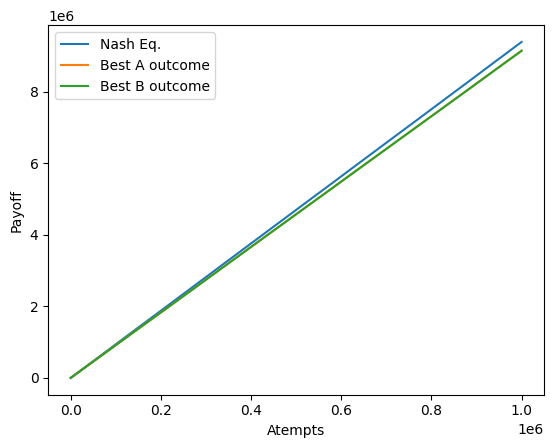

In [126]:
nash_eq = []
a_max = []
b_max = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = randomize()
    numbers_for_b = randomize()
    n, a, b = find_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_max.append(a_temp)
    b_max.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_max, label = 'Best A outcome')
plt.plot(x, b_max, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Payoff')
plt.show()

### 8. Comparison with Alternative Strategies:
Comparison of Nash equilibrium strategies with alternative approaches in non-zero-sum games.
Evaluation of the effectiveness and robustness of Nash equilibrium solutions.

### 9. Implications for Strategic Decision Making:
Insights into the practical implications of Nash equilibrium in real-world competitive environments.
Recommendations for strategic decision-makers based on the project findings.

### 10. Conclusion and Future Directions:
Summary of key findings and conclusions drawn from the project.
Suggestions for future research directions and potential areas of exploration in non-zero-sum game theory.

### References